<a href="https://colab.research.google.com/github/AntonioWh1te/The-Journey/blob/main/Phase_3_1_PyQuant_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

# Create a simple DataFrame from a dictionary
data = {
    "Name": ["Alice", "Bob", "Alina"],
    "Age": [25, 30, 22],
    "City": ["Orlando", "Fremont", "New York"],
    "Occupation": ["Engineer", "Doctor", "Podiatrist"]
}

df = pd.DataFrame(data)
print(df)

# pd.DataFrame(data) turns a dictionary of lists into a table-like structure.
# Each Key in the dictionary ("Name", "Age", "City") becomes a column


    Name  Age      City  Occupation
0  Alice   25   Orlando    Engineer
1    Bob   30   Fremont      Doctor
2  Alina   22  New York  Podiatrist


In [5]:
!pip install pandas yfinance matplotlib

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#Ensures plots show up within the notebook
%matplotlib inline

ticker = "NVDA"
start = "2022-01-01"
end = "2023-01-01"

df = yf.download(ticker, start = start, end = end)
print(df.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           NVDA       NVDA       NVDA       NVDA       NVDA
Date                                                             
2022-01-03  30.070988  30.660008  29.735545  29.765496  391547000
2022-01-04  29.241371  30.417415  28.301933  30.226732  527154000
2022-01-05  27.558168  29.367160  27.487287  28.900935  498064000
2022-01-06  28.131212  28.390781  27.020061  27.594105  454186000
2022-01-07  27.201757  28.374808  27.012072  28.094274  409939000


Enter your API Key Here: ··········
{'symbol': 'NVDA', 'historical': [{'date': '2025-03-03', 'close': 114.06}, {'date': '2025-02-28', 'close': 124.92}, {'date': '2025-02-27', 'close': 120.15}, {'date': '2025-02-26', 'close': 131.28}, {'date': '2025-02-25', 'close': 126.63}, {'date': '2025-02-24', 'close': 130.28}, {'date': '2025-02-21', 'close': 134.43}, {'date': '2025-02-20', 'close': 140.11}, {'date': '2025-02-19', 'close': 139.23}, {'date': '2025-02-18', 'close': 139.4}, {'date': '2025-02-14', 'close': 138.85}, {'date': '2025-02-13', 'close': 135.29}, {'date': '2025-02-12', 'close': 131.14}, {'date': '2025-02-11', 'close': 132.8}, {'date': '2025-02-10', 'close': 133.57}, {'date': '2025-02-07', 'close': 129.84}, {'date': '2025-02-06', 'close': 128.68}, {'date': '2025-02-05', 'close': 124.83}, {'date': '2025-02-04', 'close': 118.65}, {'date': '2025-02-03', 'close': 116.66}, {'date': '2025-01-31', 'close': 120.07}, {'date': '2025-01-30', 'close': 124.65}, {'date': '2025-01-29', 'close'

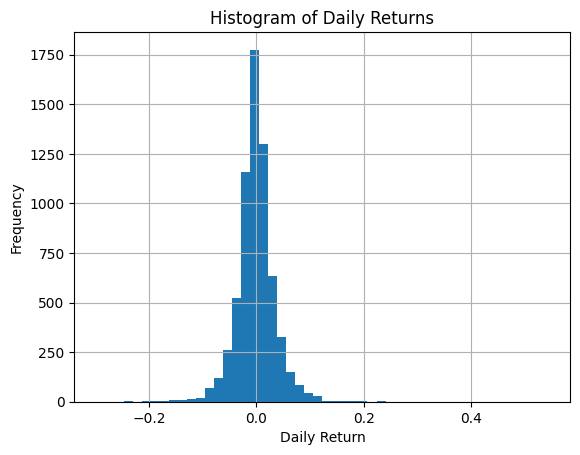

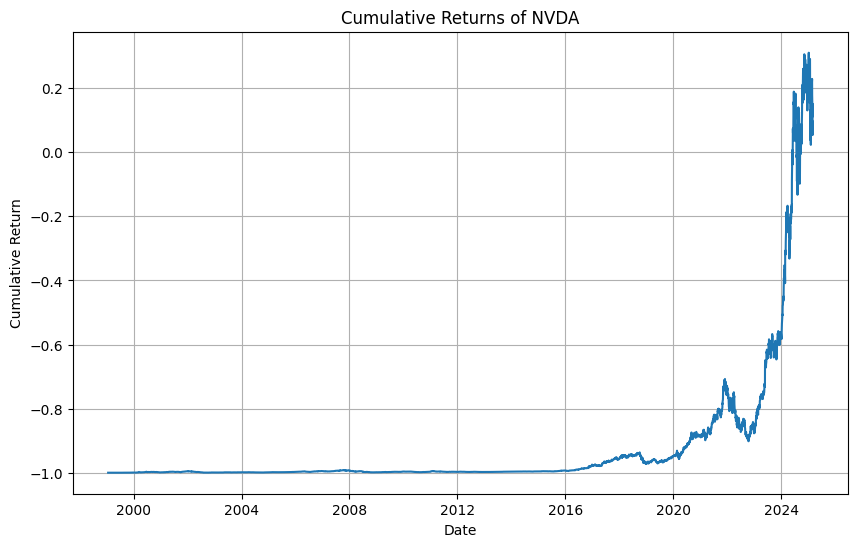

<ipython-input-8-4dcfa686e348>:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pct_change = (df['close'][i] - df['close'][i - 1]) / df['close'][i - 1]
<ipython-input-8-4dcfa686e348>:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df.index[i], df['close'][i], f'{pct_change:.2%}', ha='right', va='bottom')


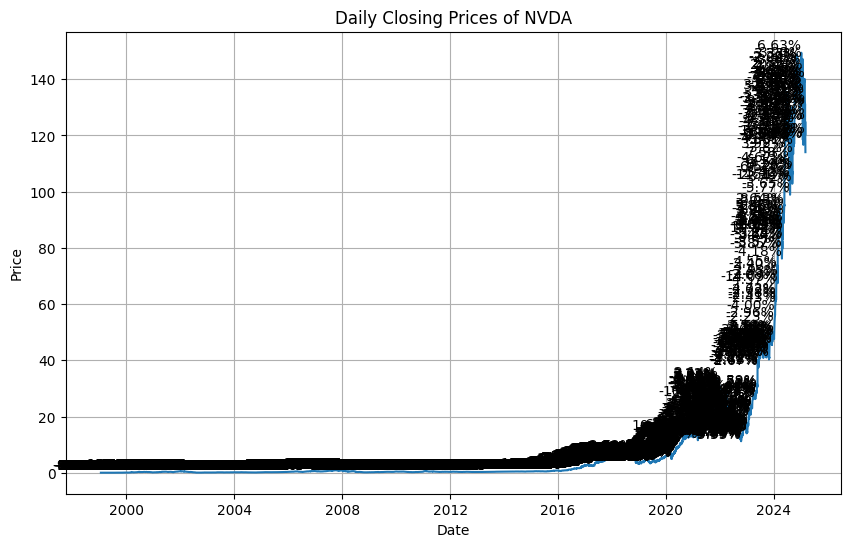

In [8]:
import pandas as pd
import getpass
import requests
import matplotlib.pyplot as plt
import seaborn as sns

apikey = getpass.getpass("Enter your API Key Here: ")
ticker = "NVDA"

# Constructing the URL
url = f"https://financialmodelingprep.com/api/v3/historical-price-full/{ticker}?apikey={apikey}&serietype=line"

# Make the API request and parse the JSON
response = requests.get(url)
data_json = response.json()

# Print the raw JSON structure to check it out
print(data_json)

historical_data = data_json.get("historical", [])
df = pd.DataFrame(historical_data)

# Convert the 'date' column to datetime and set it as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

print("First 5 rows of the DataFrame:")
print(df.head())

print(df.columns)
# Calculate the daily return using the adjusted close prices

df['Daily_Return'] = df['close'].pct_change()

print("A sample of adjusted close prices and their daily returns:")
print(df[['close', 'Daily_Return']].head(10))

# Plot a histogram of the daily returns
df['Daily_Return'].hist(bins=50)
plt.title("Histogram of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

# Assuming df is your DataFrame with 'Daily_Return' column
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod() - 1
# Calculate cumulative returns

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Cumulative_Return'])
plt.title('Cumulative Returns of NVDA')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()

# Assuming df is your DataFrame with 'close' column
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['close'])
plt.title('Daily Closing Prices of NVDA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

